# Análisis Exploratorio de Datos (EDA)

Este notebook realiza un análisis exploratorio de los datos de transacciones de tarjetas de crédito para detectar patrones y características relevantes para la detección de fraude.

## Contenido

1. Carga y exploración inicial de datos
2. Análisis de la distribución de clases
3. Análisis de variables numéricas
4. Detección y análisis de outliers
5. Análisis de correlaciones
6. Análisis temporal de transacciones
7. Análisis de transacciones fraudulentas vs. legítimas
8. Conclusiones y recomendaciones

## 1. Carga y exploración inicial de datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import sys

# Configurar visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignorar advertencias
warnings.filterwarnings('ignore')

# Añadir directorio raíz al path para importar módulos personalizados
sys.path.append('..')

# Importar funciones personalizadas
from src.config import RAW_DATA_FILE, FIGURES_DIR
from src.data_prep import load_data, check_data_quality
from src.utils import save_figure, detect_outliers_iqr

In [2]:
# Cargar datos
df = load_data(RAW_DATA_FILE)

# Mostrar las primeras filas
df.head()

Cargando datos desde c:\Projects\Credit_fraud\data\raw\creditcard.csv...
Datos cargados: 284807 filas y 31 columnas.
Función load_data ejecutada en 1.63 segundos


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Información general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
df.info()

Dimensiones del dataset: (284807, 31)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-nul

In [4]:
# Estadísticas descriptivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [5]:
# Verificar calidad de los datos
quality_report = check_data_quality(df)

Verificando calidad de los datos...
Valores nulos: 0
Columnas con valores nulos: []
Filas duplicadas: 1081
Valores infinitos: 0
Distribución de clases:
  Clase 0: 99.83%
  Clase 1: 0.17%
Función check_data_quality ejecutada en 0.99 segundos


## 2. Análisis de la distribución de clases

In [6]:
# Analizar distribución de clases
class_counts = df['Class'].value_counts()
class_pct = df['Class'].value_counts(normalize=True) * 100

print("Distribución de clases:")
for cls, count in class_counts.items():
    print(f"  Clase {cls}: {count} ({class_pct[cls]:.2f}%)")

Distribución de clases:
  Clase 0: 284315 (99.83%)
  Clase 1: 492 (0.17%)


Figura guardada en c:\Projects\Credit_fraud\reports\figures\class_distribution.png


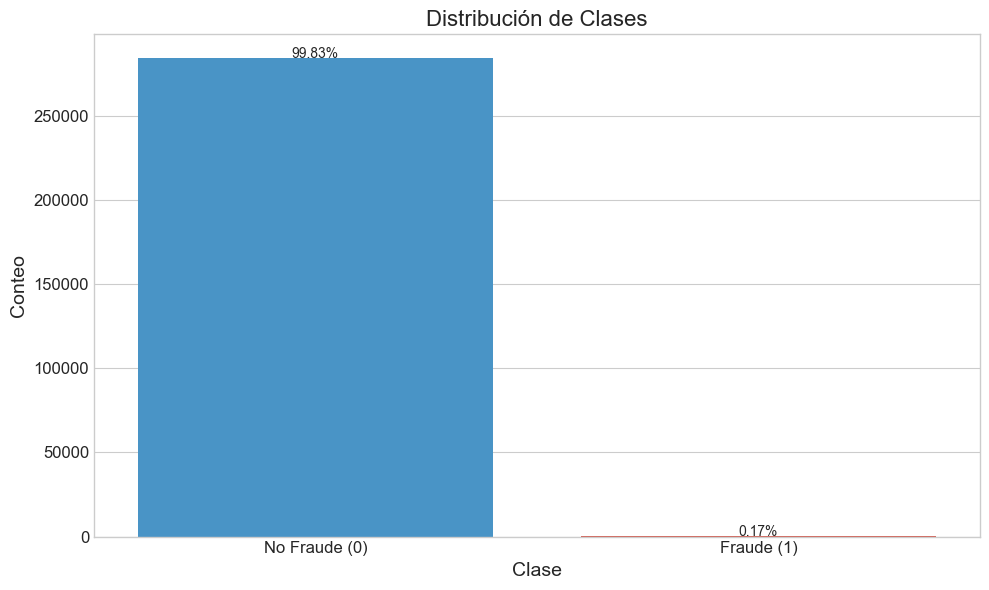

In [7]:
# Visualizar distribución de clases
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])

# Añadir etiquetas con porcentajes
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            f'{class_pct.iloc[i]:.2f}%',
            ha="center")

plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.xticks(ticks=[0, 1], labels=['No Fraude (0)', 'Fraude (1)'])
plt.tight_layout()

# Guardar figura
save_figure('class_distribution.png')

plt.show()

### Observaciones sobre la distribución de clases

- El dataset está altamente desbalanceado, con una proporción muy pequeña de transacciones fraudulentas.
- Este desbalance es típico en problemas de detección de fraude, pero presenta desafíos para el modelado.
- Será necesario aplicar técnicas como SMOTE para balancear las clases durante el entrenamiento.

## 3. Análisis de variables numéricas

Figura guardada en c:\Projects\Credit_fraud\reports\figures\amount_distribution.png


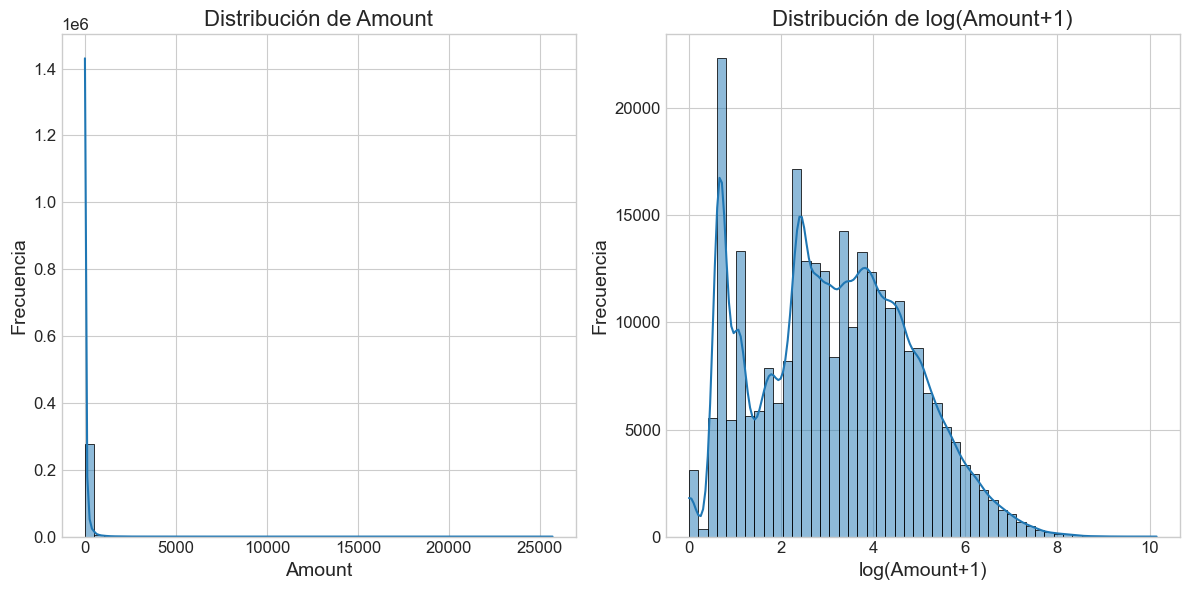

In [8]:
# Analizar distribución de Amount
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['Amount']), bins=50, kde=True)
plt.title('Distribución de log(Amount+1)')
plt.xlabel('log(Amount+1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
save_figure('amount_distribution.png')
plt.show()

Figura guardada en c:\Projects\Credit_fraud\reports\figures\time_distribution.png


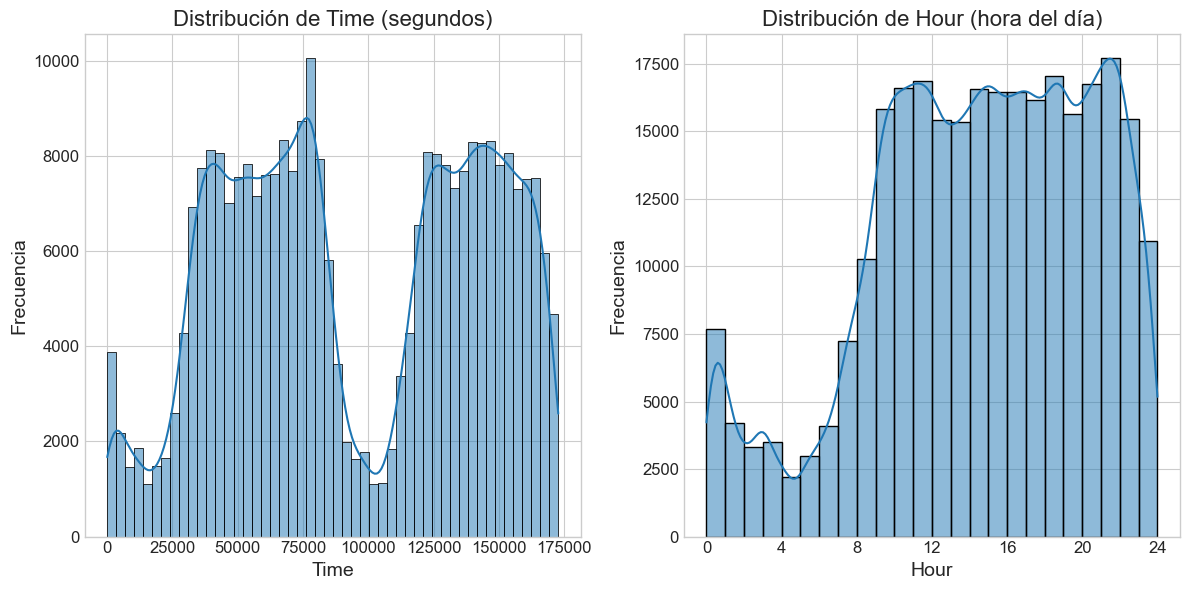

In [9]:
# Analizar distribución de Time
# Convertir Time a horas del día (0-24)
df['Hour'] = (df['Time'] / 3600) % 24

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribución de Time (segundos)')
plt.xlabel('Time')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title('Distribución de Hour (hora del día)')
plt.xlabel('Hour')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 25, 4))

plt.tight_layout()
save_figure('time_distribution.png')
plt.show()

Figura guardada en c:\Projects\Credit_fraud\reports\figures\v_features_distribution.png


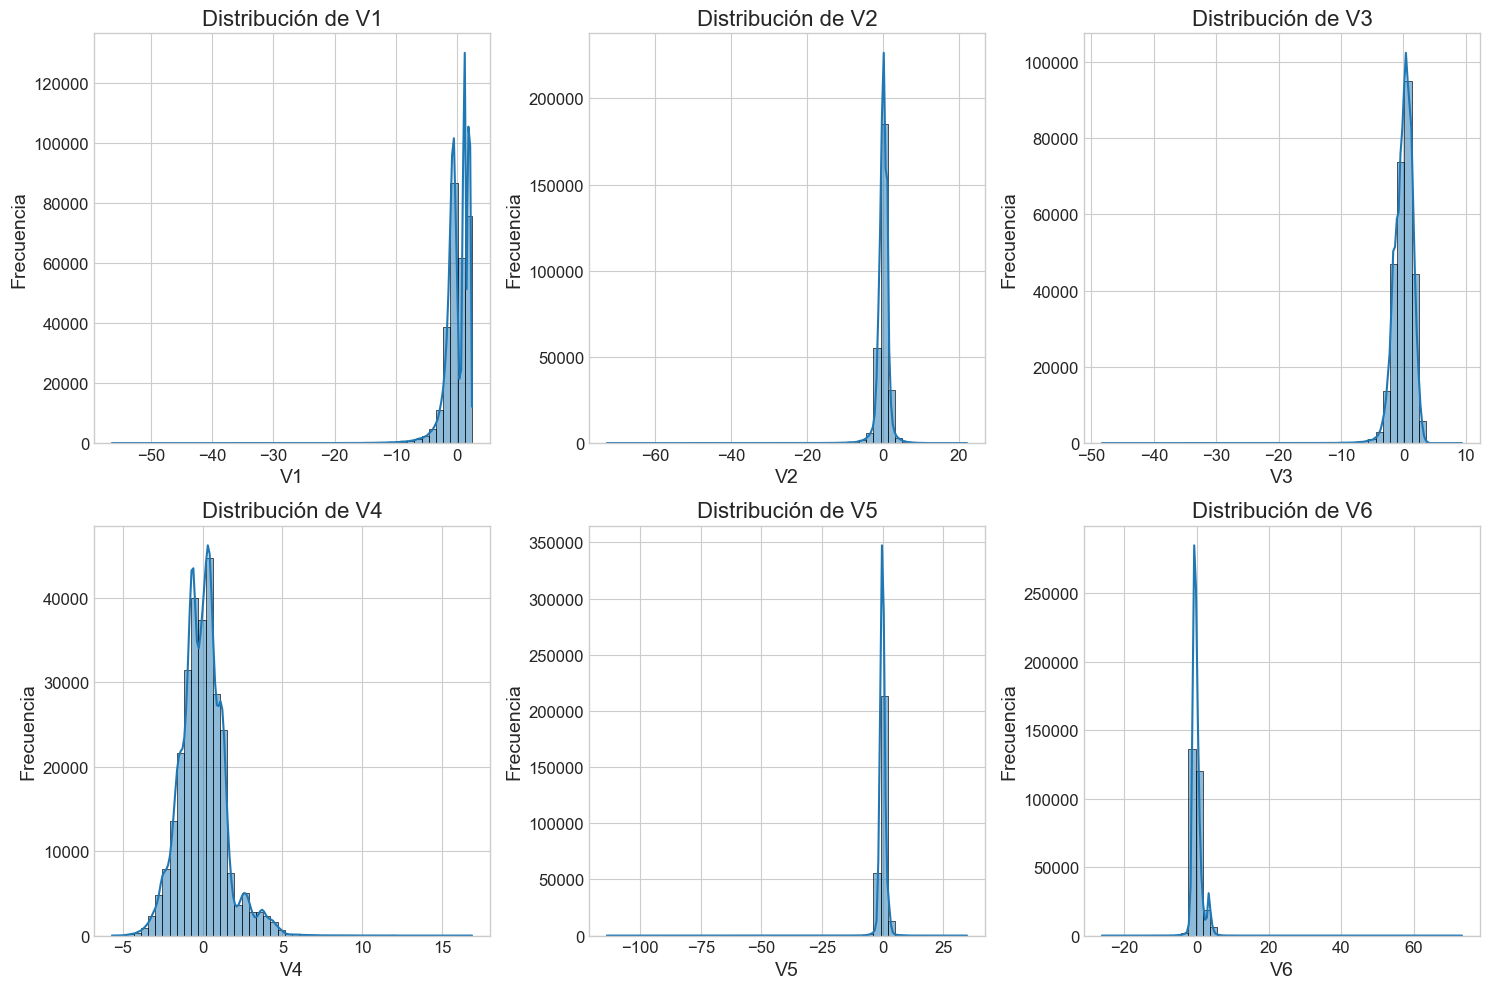

In [10]:
# Analizar distribución de características V1-V28
# Seleccionar un subconjunto de características para visualizar
v_cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']

plt.figure(figsize=(15, 10))
for i, col in enumerate(v_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
save_figure('v_features_distribution.png')
plt.show()

### Observaciones sobre las variables numéricas

- La variable `Amount` tiene una distribución sesgada hacia la derecha, con muchas transacciones de bajo monto y pocas de alto monto.
- La transformación logarítmica de `Amount` normaliza su distribución, lo que será útil para el modelado.
- La variable `Time` representa segundos transcurridos desde el inicio del dataset, y su conversión a hora del día (`Hour`) puede revelar patrones temporales.
- Las características V1-V28 son componentes principales resultantes de PCA, y muchas muestran distribuciones aproximadamente normales.

## 4. Detección y análisis de outliers

In [11]:
# Detectar outliers en Amount
outliers_amount = detect_outliers_iqr(df['Amount'])
print(f"Outliers en Amount: {outliers_amount['count']} ({outliers_amount['percentage']:.2f}%)")
print(f"Límite inferior: {outliers_amount['lower_bound']:.2f}")
print(f"Límite superior: {outliers_amount['upper_bound']:.2f}")

Outliers en Amount: 31904 (11.20%)
Límite inferior: -101.75
Límite superior: 184.51


Figura guardada en c:\Projects\Credit_fraud\reports\figures\amount_boxplot.png


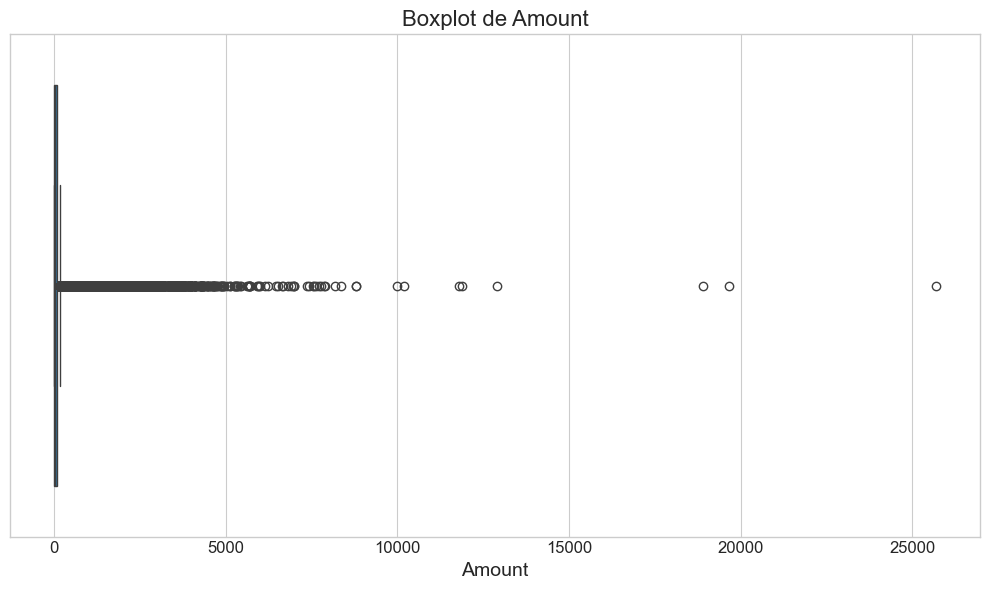

In [12]:
# Visualizar outliers en Amount con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot de Amount')
plt.xlabel('Amount')
plt.tight_layout()
save_figure('amount_boxplot.png')
plt.show()

In [13]:
# Detectar outliers en características V1-V28
v_cols = [f'V{i}' for i in range(1, 29)]
outliers_info = {}

for col in v_cols:
    outliers_info[col] = detect_outliers_iqr(df[col])

# Mostrar las 5 características con mayor porcentaje de outliers
outliers_pct = {col: info['percentage'] for col, info in outliers_info.items()}
top_outliers = sorted(outliers_pct.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 características con mayor porcentaje de outliers:")
for col, pct in top_outliers:
    print(f"  {col}: {pct:.2f}%")

Top 5 características con mayor porcentaje de outliers:
  V27: 13.75%
  V28: 10.65%
  V20: 9.75%
  V8: 8.47%
  V6: 8.06%


Figura guardada en c:\Projects\Credit_fraud\reports\figures\top_outliers_boxplot.png


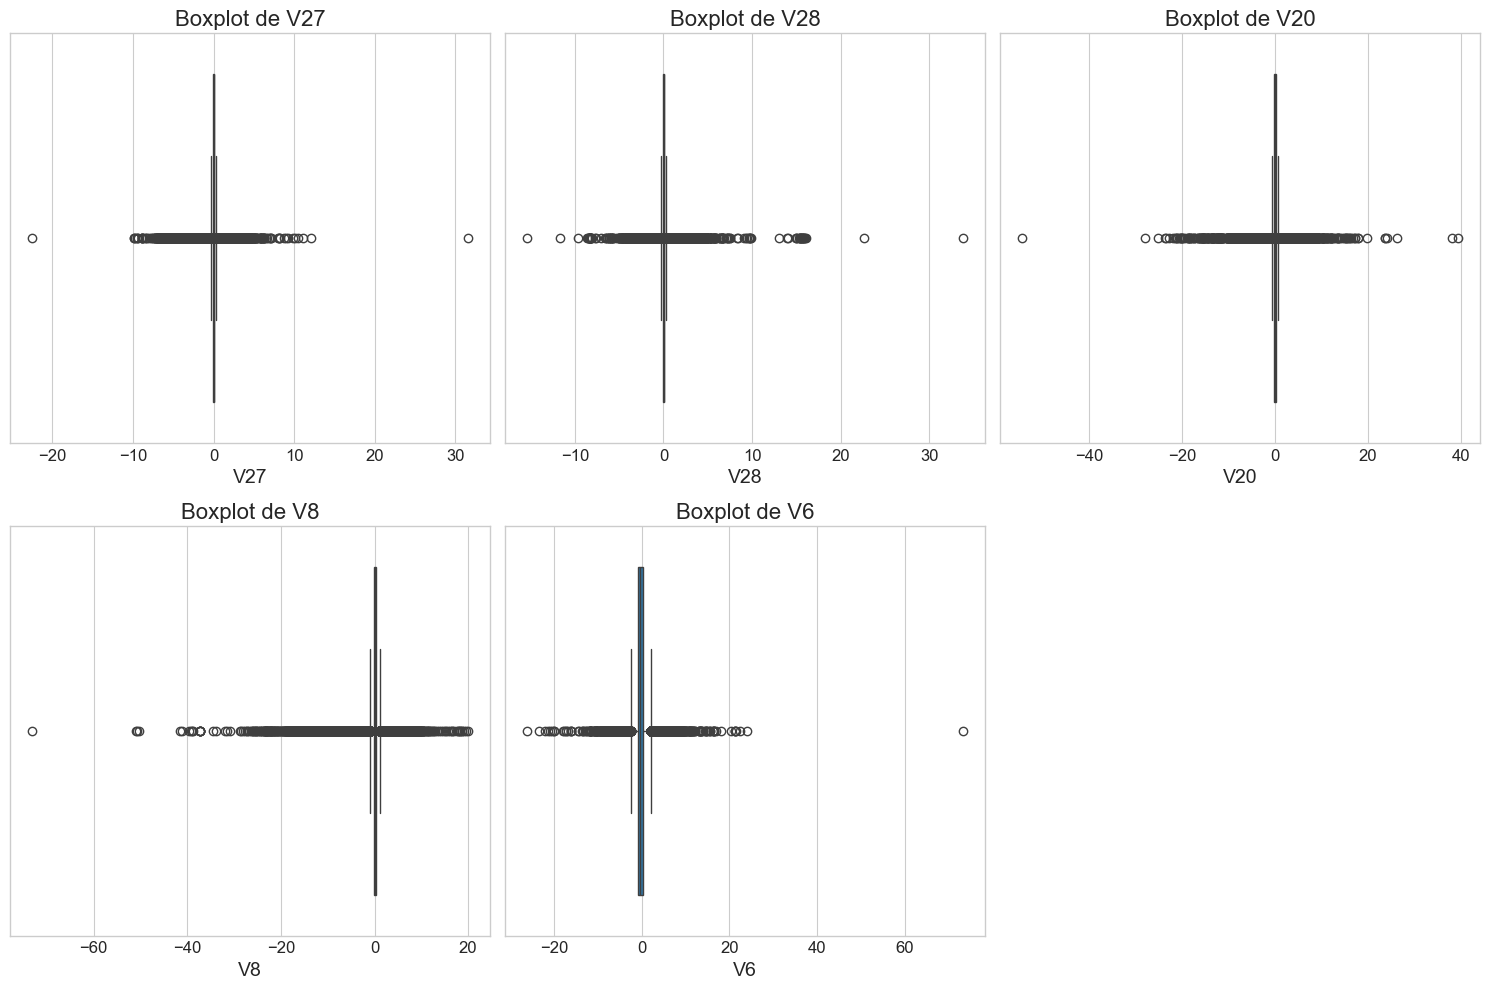

In [14]:
# Visualizar outliers en las características con más outliers
top_cols = [col for col, _ in top_outliers]

plt.figure(figsize=(15, 10))
for i, col in enumerate(top_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)

plt.tight_layout()
save_figure('top_outliers_boxplot.png')
plt.show()

### Observaciones sobre outliers

- La variable `Amount` contiene outliers significativos, lo que es esperado en datos financieros.
- Algunas características V1-V28 también presentan outliers, que podrían ser indicativos de transacciones fraudulentas.
- Es importante tratar estos outliers adecuadamente, ya que pueden afectar el rendimiento de algunos algoritmos de machine learning.

## 5. Análisis de correlaciones

Figura guardada en c:\Projects\Credit_fraud\reports\figures\correlation_matrix.png


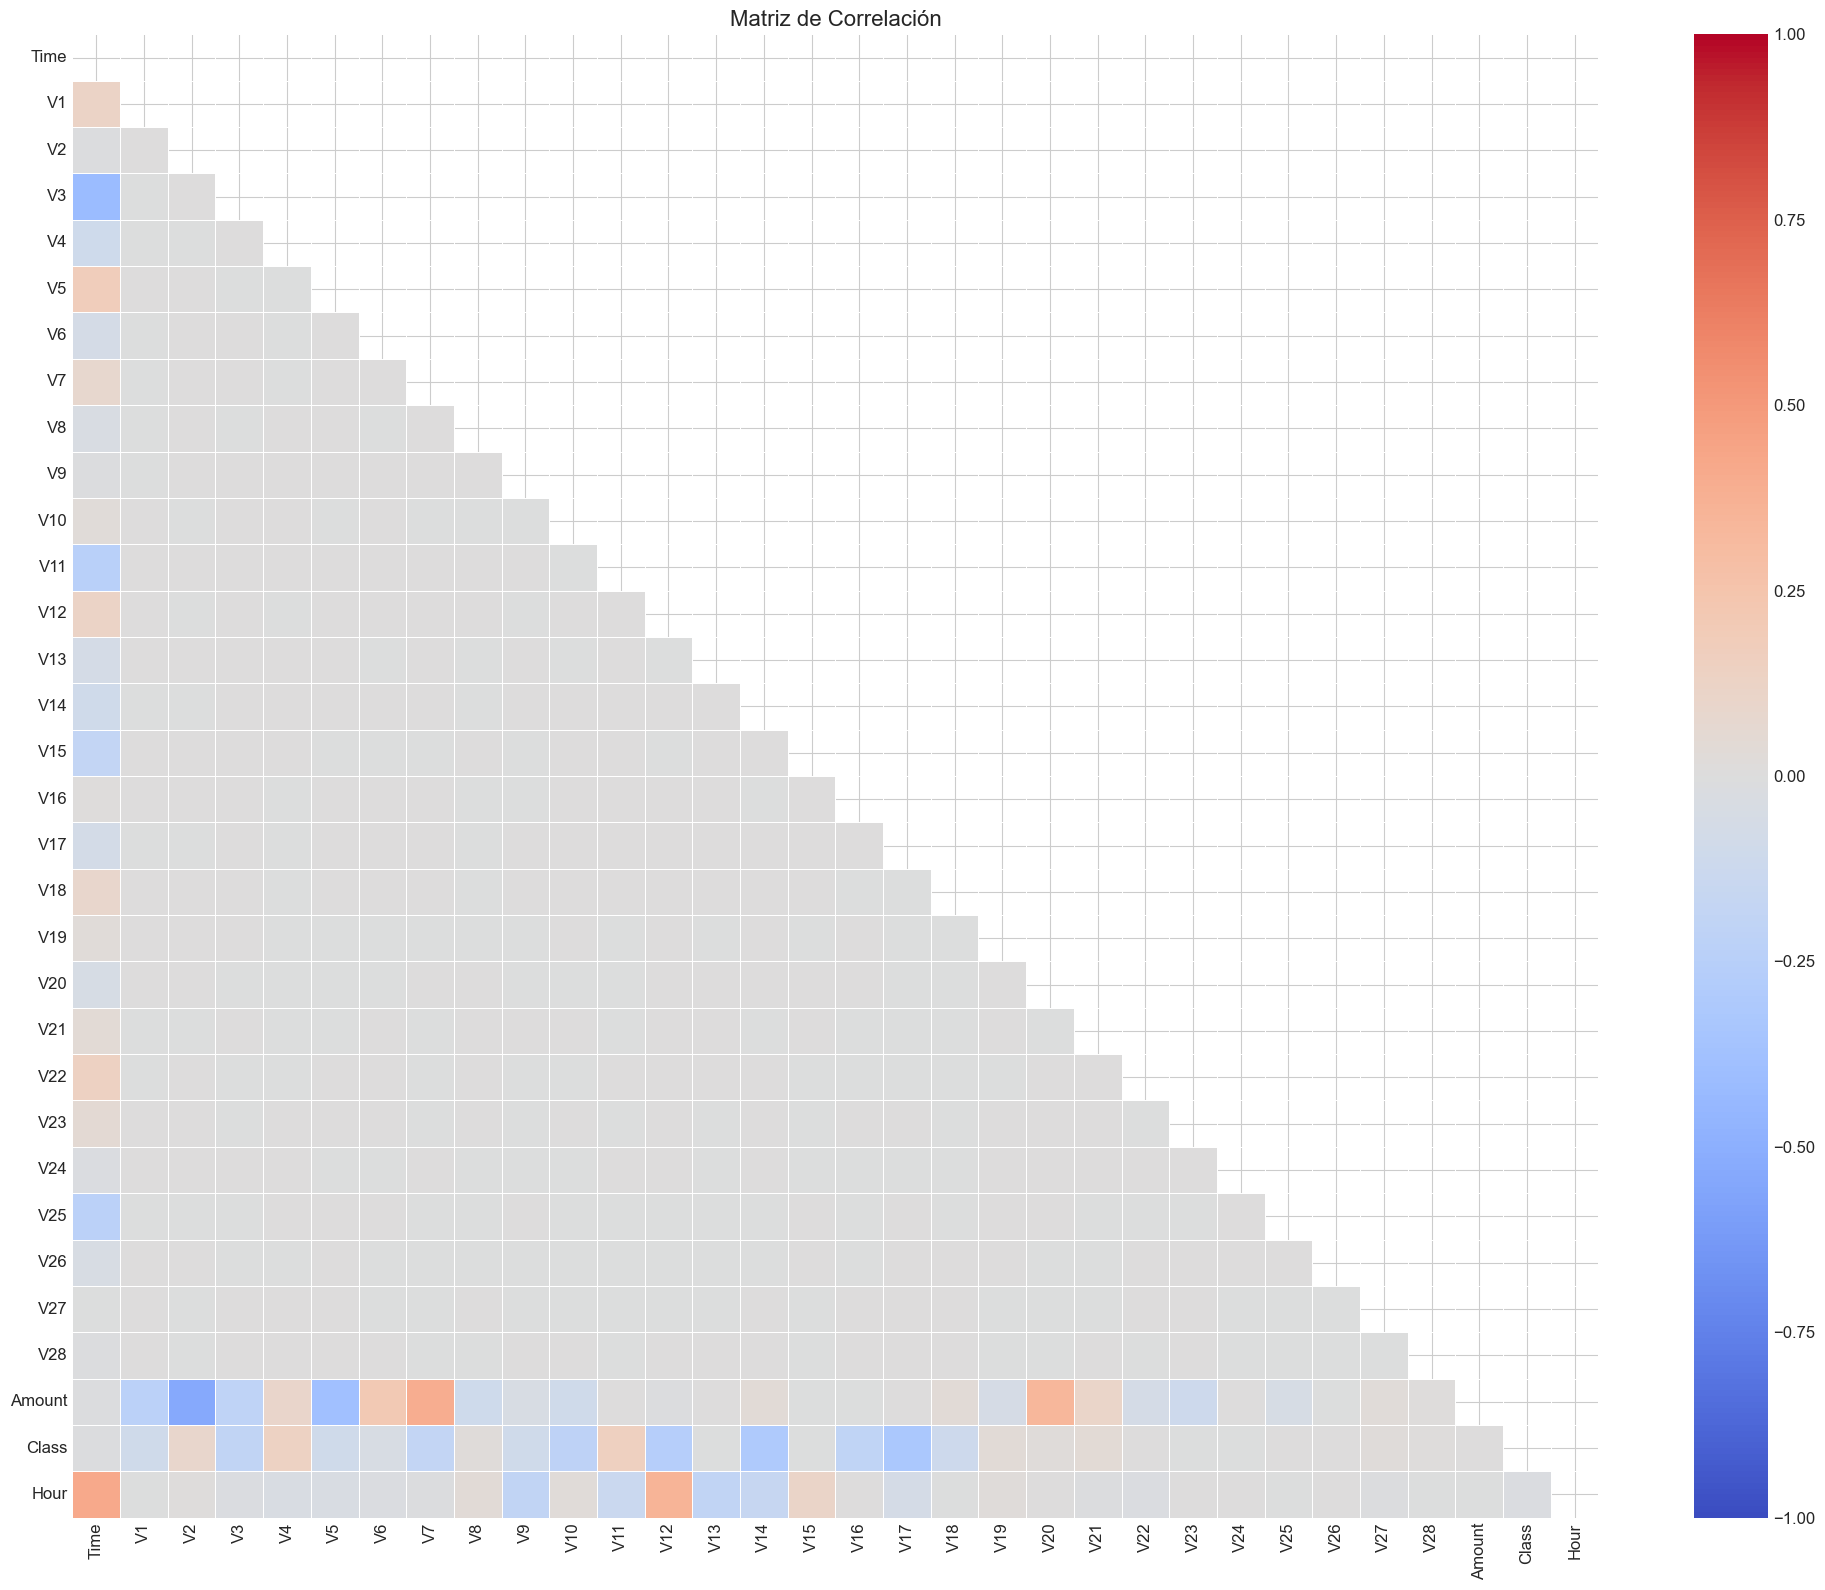

In [15]:
# Calcular matriz de correlación
corr_matrix = df.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=False, 
            center=0, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.tight_layout()
save_figure('correlation_matrix.png')
plt.show()

In [16]:
# Correlación con la variable objetivo (Class)
corr_with_class = corr_matrix['Class'].drop('Class').sort_values(ascending=False)

# Mostrar las 10 características más correlacionadas con Class
print("Top 10 características más correlacionadas con Class:")
print(corr_with_class.head(10))

# Mostrar las 10 características menos correlacionadas con Class
print("\nTop 10 características menos correlacionadas con Class:")
print(corr_with_class.tail(10))

Top 10 características más correlacionadas con Class:
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 características menos correlacionadas con Class:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


Figura guardada en c:\Projects\Credit_fraud\reports\figures\correlation_with_class.png


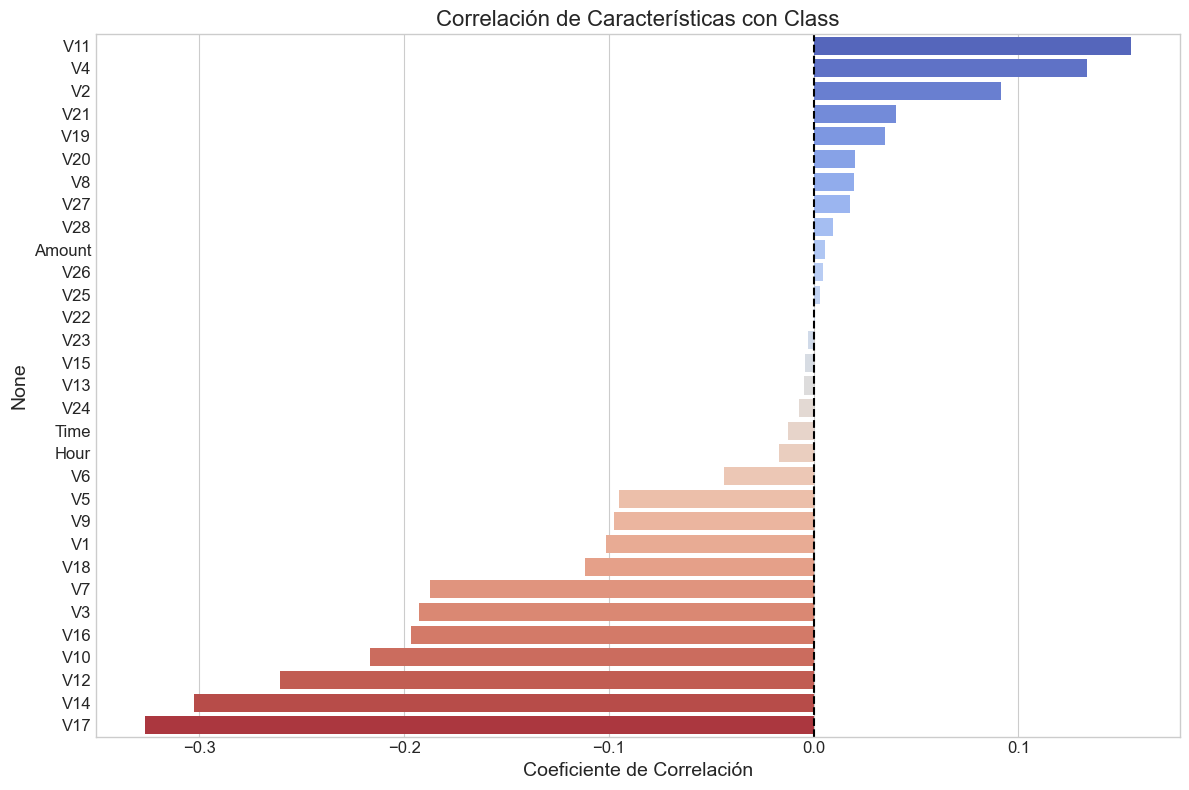

In [17]:
# Visualizar correlaciones con Class
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_class.values, y=corr_with_class.index, palette='coolwarm')
plt.title('Correlación de Características con Class')
plt.xlabel('Coeficiente de Correlación')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
save_figure('correlation_with_class.png')
plt.show()

### Observaciones sobre correlaciones

- Algunas características muestran correlaciones significativas con la variable objetivo `Class`.
- Las características con mayor correlación positiva indican mayor probabilidad de fraude.
- Las características con mayor correlación negativa indican menor probabilidad de fraude.
- La mayoría de las características V1-V28 tienen baja correlación entre sí, lo que es esperado debido a que son componentes principales.

## 6. Análisis temporal de transacciones

Usando una muestra de 100000 filas para acelerar el análisis
Figura guardada en c:\Projects\Credit_fraud\reports\figures\transactions_by_hour.png


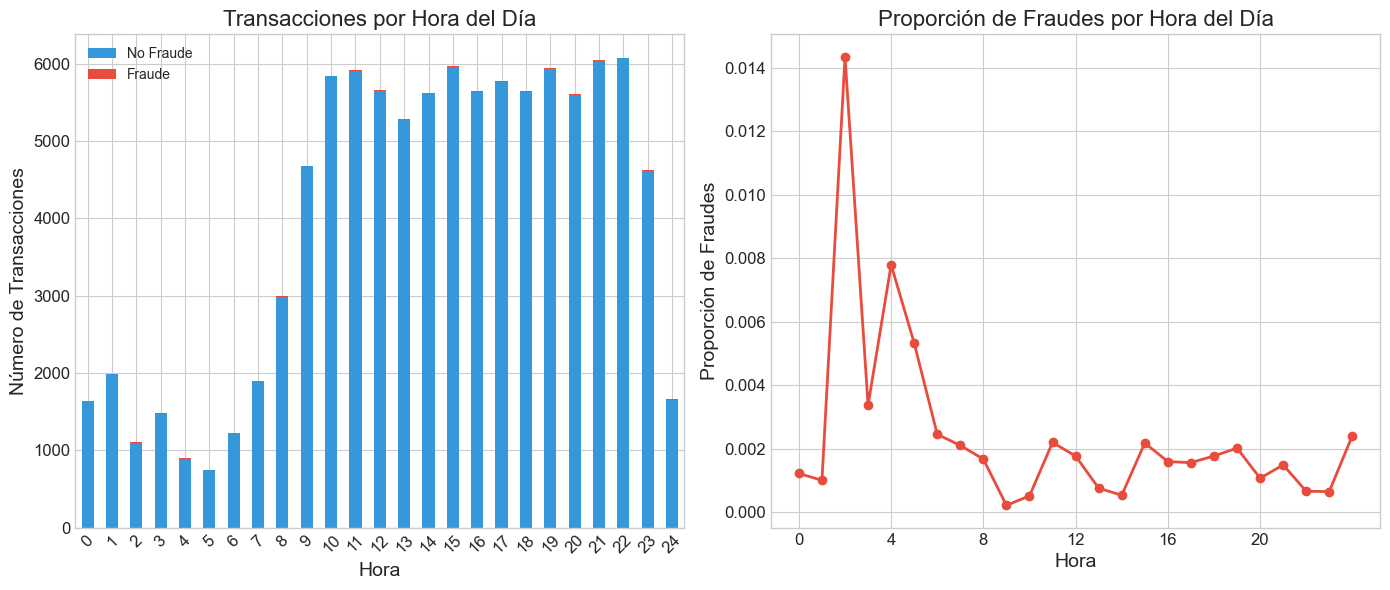

In [18]:
# Optimización del análisis de transacciones por hora del día
import numpy as np

# Opción 1: Usar un muestreo si el dataset es muy grande (más de 100,000 filas)
sample_size = min(100000, len(df))
if len(df) > sample_size:
    print(f"Usando una muestra de {sample_size} filas para acelerar el análisis")
    df_sample = df.sample(sample_size, random_state=42)
else:
    df_sample = df

# Crear figura
plt.figure(figsize=(14, 6))

# Método más eficiente para agrupar y contar
# Crear una tabla de contingencia directamente
hour_counts = pd.crosstab(df_sample['Hour'].round().astype(int), df_sample['Class'])

# Calcular proporciones de manera más eficiente
fraud_ratio = hour_counts[1] / (hour_counts[0] + hour_counts[1])

# Graficar conteo por hora - usar un subset de horas para mayor claridad
plt.subplot(1, 2, 1)
hour_counts.plot(kind='bar', stacked=True, ax=plt.gca(), 
                color=['#3498db', '#e74c3c'])
plt.title('Transacciones por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Transacciones')
plt.legend(['No Fraude', 'Fraude'])
plt.xticks(rotation=45)

# Graficar proporción por hora - usar un subset de horas para mayor claridad
plt.subplot(1, 2, 2)
fraud_ratio.plot(kind='line', marker='o', ax=plt.gca(), 
                color='#e74c3c', linewidth=2)
plt.title('Proporción de Fraudes por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Proporción de Fraudes')
plt.grid(True)
plt.xticks(range(0, 24, 4))  # Reducir número de etiquetas en el eje x

plt.tight_layout()
save_figure('transactions_by_hour.png')
plt.show()

### Observaciones sobre patrones temporales

- La distribución de transacciones varía a lo largo del día, con picos en ciertas horas.
- La proporción de transacciones fraudulentas también varía por hora, lo que sugiere que el momento del día puede ser un factor relevante para la detección de fraude.
- Las horas de la madrugada podrían tener mayor riesgo de fraude en proporción al volumen de transacciones.

## 7. Análisis de transacciones fraudulentas vs. legítimas

In [19]:
# Separar transacciones fraudulentas y legítimas
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print(f"Transacciones fraudulentas: {len(fraud)}")
print(f"Transacciones legítimas: {len(non_fraud)}")

Transacciones fraudulentas: 492
Transacciones legítimas: 284315


Figura guardada en c:\Projects\Credit_fraud\reports\figures\amount_by_class.png


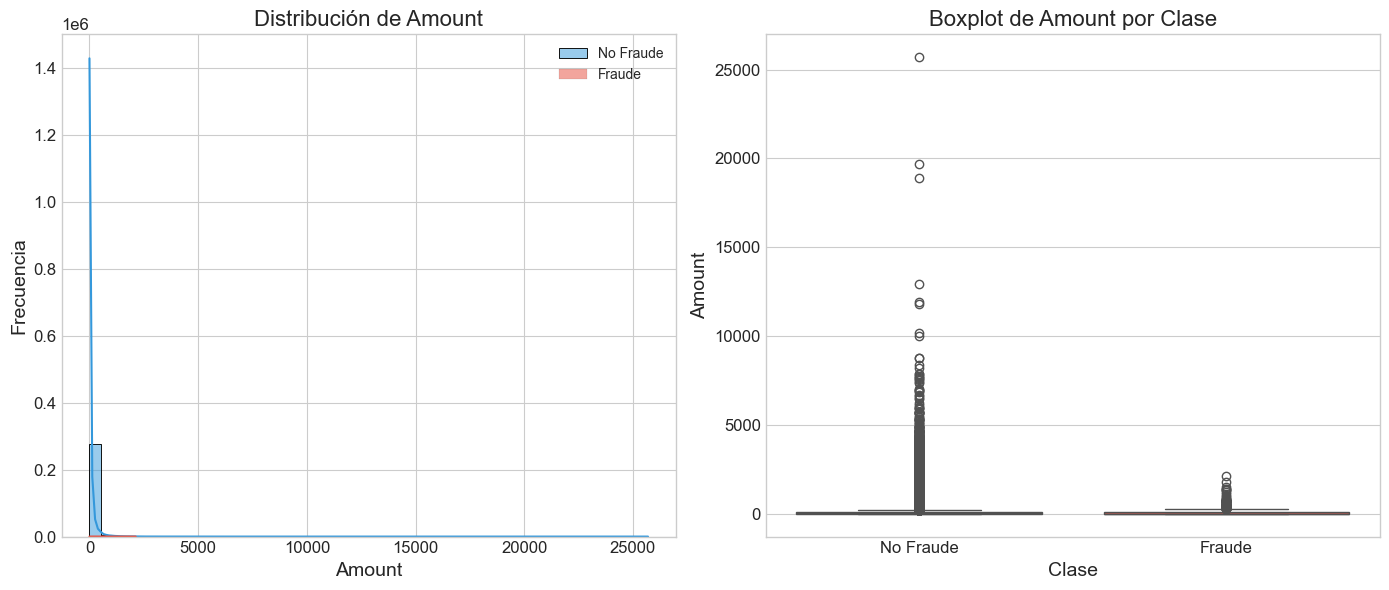

In [20]:
# Comparar distribución de Amount entre transacciones fraudulentas y legítimas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(non_fraud['Amount'], bins=50, kde=True, color='#3498db', label='No Fraude')
sns.histplot(fraud['Amount'], bins=50, kde=True, color='#e74c3c', label='Fraude')
plt.title('Distribución de Amount')
plt.xlabel('Amount')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(x='Class', y='Amount', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Boxplot de Amount por Clase')
plt.xlabel('Clase')
plt.ylabel('Amount')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])

plt.tight_layout()
save_figure('amount_by_class.png')
plt.show()

Figura guardada en c:\Projects\Credit_fraud\reports\figures\top_features_by_class.png


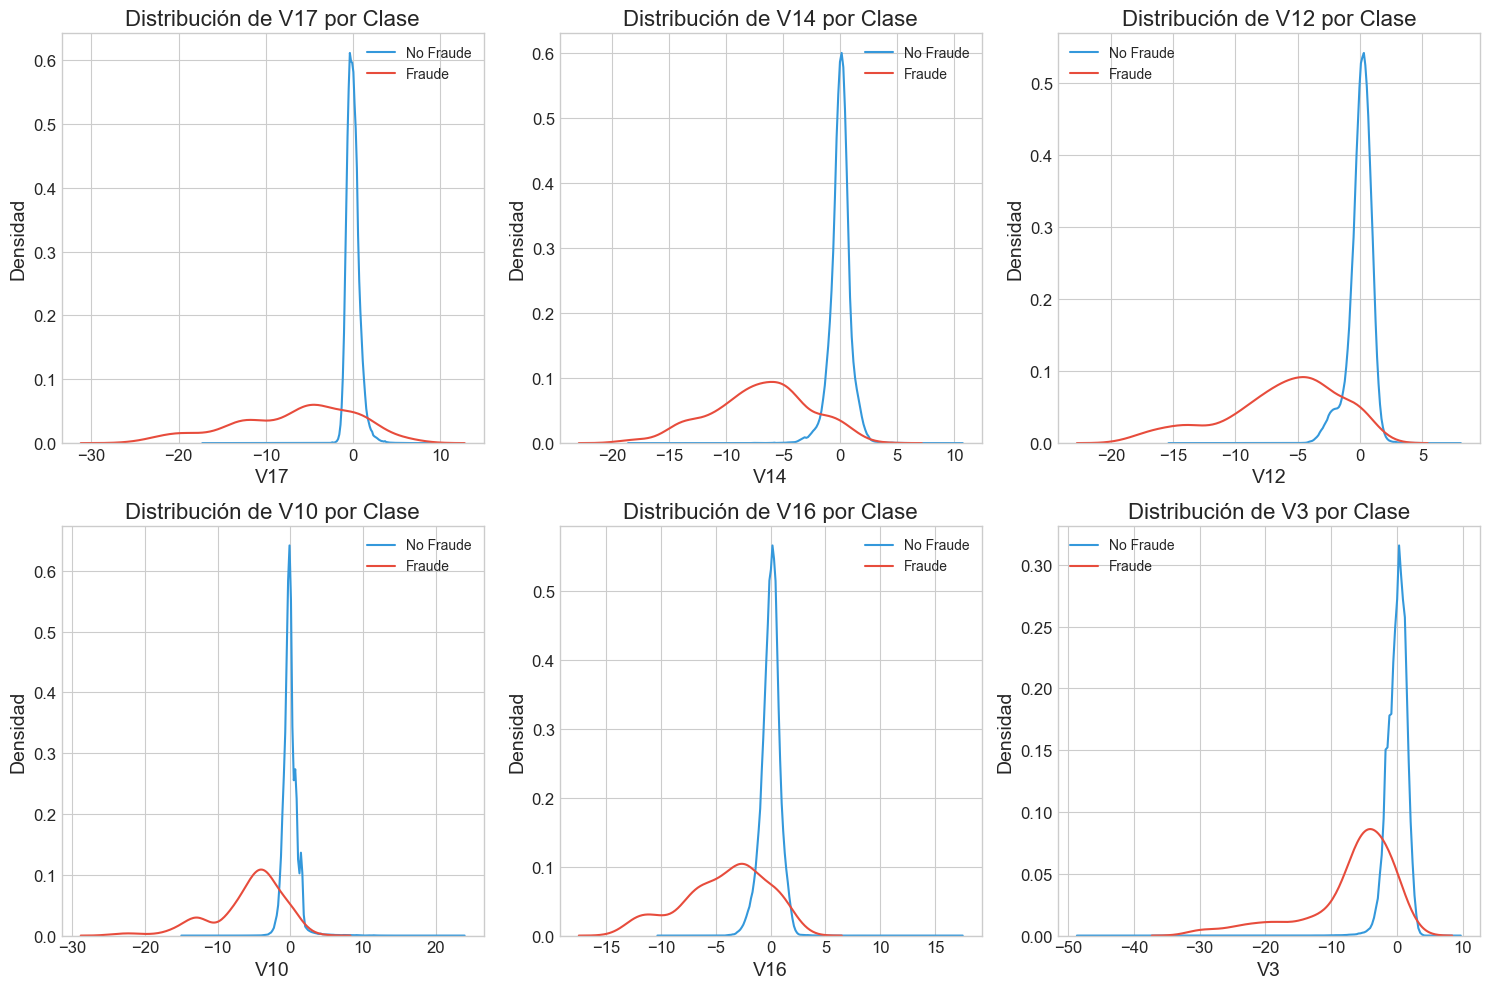

In [21]:
# Comparar distribuciones de características principales entre clases
# Seleccionar las 6 características más correlacionadas con Class
top_features = corr_with_class.abs().sort_values(ascending=False).head(6).index

plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(non_fraud[feature], label='No Fraude', color='#3498db')
    sns.kdeplot(fraud[feature], label='Fraude', color='#e74c3c')
    plt.title(f'Distribución de {feature} por Clase')
    plt.xlabel(feature)
    plt.ylabel('Densidad')
    plt.legend()

plt.tight_layout()
save_figure('top_features_by_class.png')
plt.show()

Figura guardada en c:\Projects\Credit_fraud\reports\figures\top_features_boxplot.png


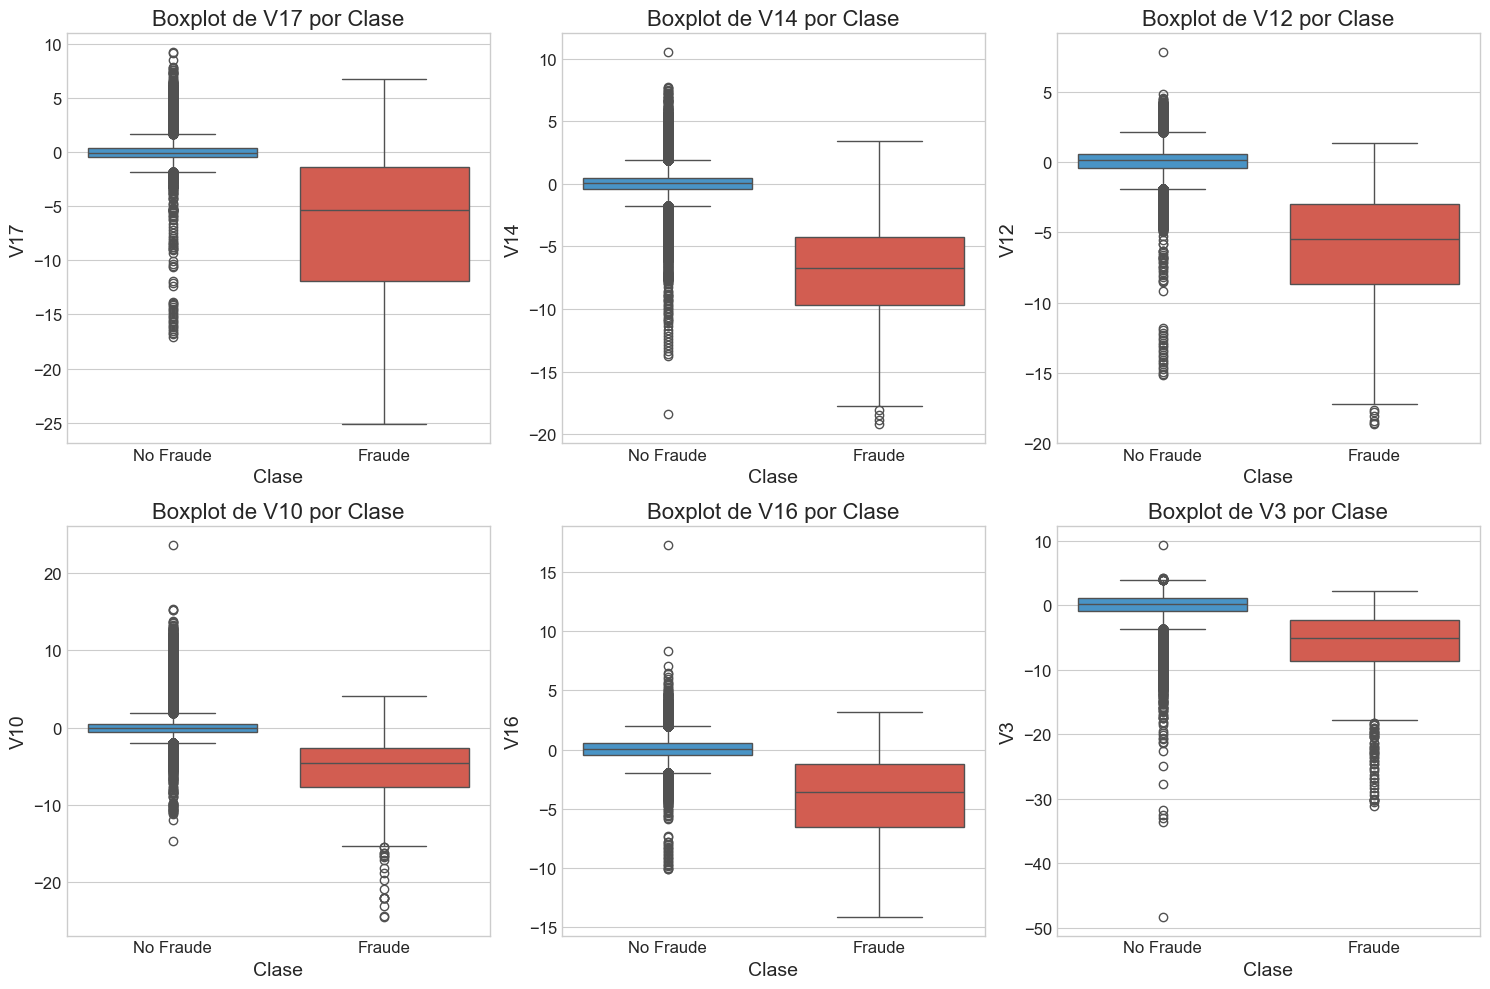

In [22]:
# Visualizar las diferencias en las características principales usando boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Class', y=feature, data=df, palette=['#3498db', '#e74c3c'])
    plt.title(f'Boxplot de {feature} por Clase')
    plt.xlabel('Clase')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['No Fraude', 'Fraude'])

plt.tight_layout()
save_figure('top_features_boxplot.png')
plt.show()

Usando una muestra estratificada de 10000 filas para el pairplot
Figura guardada en c:\Projects\Credit_fraud\reports\figures\pairplot_top_features.png


<Figure size 1000x800 with 0 Axes>

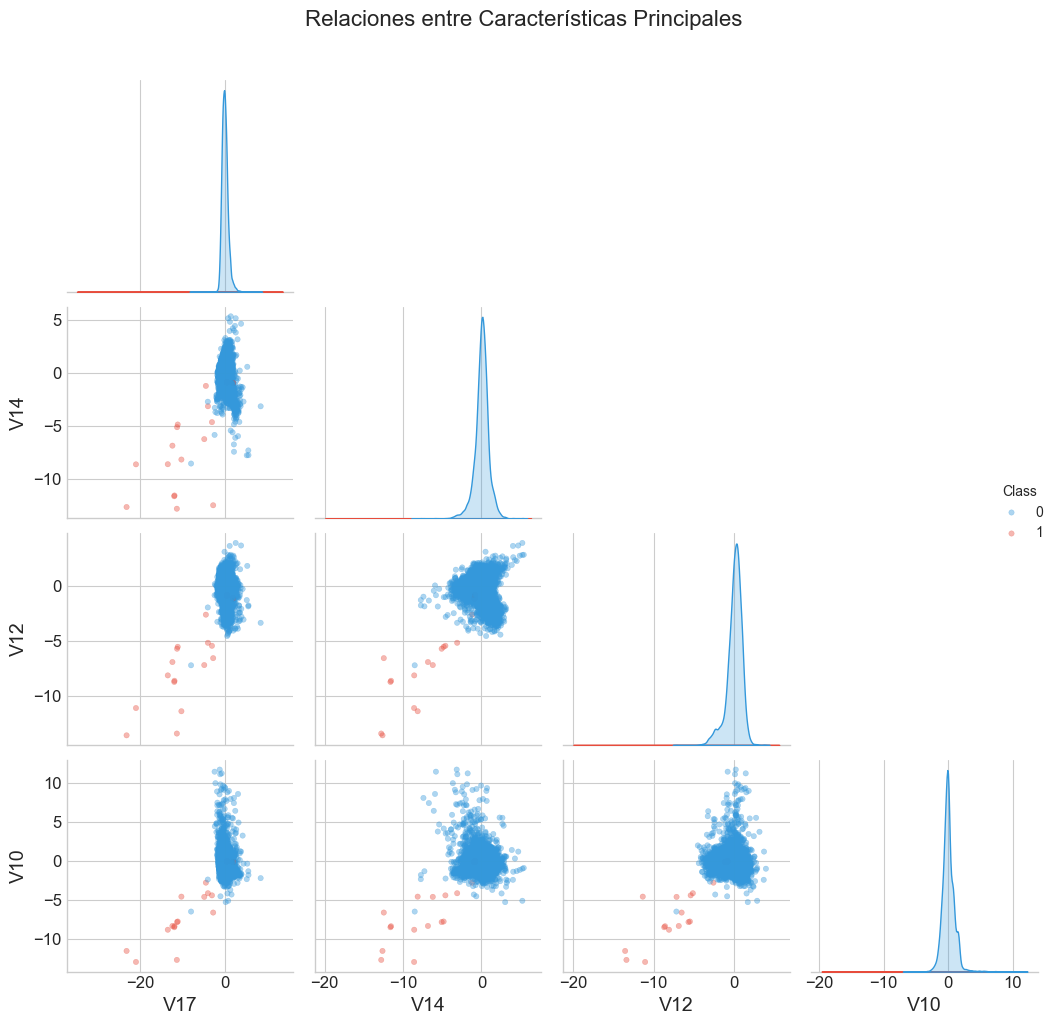

In [23]:
# Optimización del pairplot de características principales
import numpy as np

# Definir un tamaño de muestra adecuado (ajustar según sea necesario)
sample_size = min(10000, len(df))  # Limitar a 10,000 puntos máximo

# Tomar una muestra estratificada para mantener la proporción de clases
# Esto es crucial para datos desbalanceados como detección de fraude
def stratified_sample(df, target, n):
    """Toma una muestra estratificada manteniendo la proporción de clases"""
    df_minority = df[df[target] == 1]  # Clase minoritaria (fraude)
    df_majority = df[df[target] == 0]  # Clase mayoritaria (no fraude)
    
    # Si la clase minoritaria tiene menos muestras que el tamaño deseado
    if len(df_minority) < n * df[target].mean():
        # Usar todas las muestras de la clase minoritaria
        n_minority = len(df_minority)
        # Calcular cuántas muestras de la clase mayoritaria necesitamos
        n_majority = min(len(df_majority), int(n - n_minority))
    else:
        # Calcular la proporción correcta
        n_minority = int(n * df[target].mean())
        n_majority = n - n_minority
    
    # Muestrear de cada clase
    minority_sample = df_minority.sample(n_minority, random_state=42)
    majority_sample = df_majority.sample(n_majority, random_state=42)
    
    # Combinar y mezclar
    return pd.concat([minority_sample, majority_sample]).sample(frac=1, random_state=42)

# Tomar muestra estratificada
print(f"Usando una muestra estratificada de {sample_size} filas para el pairplot")
sampled_df = stratified_sample(df, 'Class', sample_size)

# Seleccionar las 4 características más correlacionadas con Class
top_4_features = corr_with_class.abs().sort_values(ascending=False).head(4).index

# Crear un dataframe con las características seleccionadas y la clase
plot_df = sampled_df[list(top_4_features) + ['Class']]

# Configurar parámetros para mejorar rendimiento
plt.figure(figsize=(10, 8))  # Crear figura primero para evitar advertencias

# Usar corner=True para mostrar solo la mitad inferior de la matriz
# Esto reduce a la mitad el número de gráficos a generar
sns.pairplot(
    plot_df, 
    hue='Class', 
    palette=['#3498db', '#e74c3c'],
    plot_kws={
        'alpha': 0.4,  # Reducir opacidad
        's': 15,       # Reducir tamaño de puntos
        'edgecolor': None  # Eliminar bordes de puntos
    },
    diag_kind='kde',
    corner=True,  # Solo mostrar la mitad inferior
    height=2.5,   # Tamaño más pequeño por gráfico
    aspect=1      # Mantener proporción cuadrada
)

plt.suptitle('Relaciones entre Características Principales', y=1.02, fontsize=16)
plt.tight_layout()
save_figure('pairplot_top_features.png')
plt.show()

# Alternativa más rápida: Matriz de correlación coloreada por clase
# Si el pairplot sigue siendo demasiado lento, puedes usar esta alternativa
def plot_correlation_by_class(df, features, class_col='Class'):
    """Genera matrices de correlación separadas por clase"""
    fig, axes = plt.subplots(1, 2, figsize=(16, 7))
    
    # Para cada clase
    for i, cls in enumerate([0, 1]):
        # Filtrar datos por clase
        df_class = df[df[class_col] == cls][features]
        
        # Calcular correlación
        corr = df_class.corr()
        
        # Visualizar
        sns.heatmap(
            corr, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            ax=axes[i],
            cbar=False,
            square=True
        )
        axes[i].set_title(f"Correlaciones para {'No Fraude' if cls==0 else 'Fraude'}")
    
    plt.tight_layout()
    save_figure('correlation_by_class.png')
    plt.show()

# Descomenta la siguiente línea si prefieres usar la alternativa
# plot_correlation_by_class(df, top_4_features)

### Observaciones sobre transacciones fraudulentas vs. legítimas

- Las transacciones fraudulentas tienden a tener montos diferentes a las legítimas, generalmente más pequeños.
- Las distribuciones de las características principales muestran diferencias significativas entre transacciones fraudulentas y legítimas.
- Algunas características muestran una clara separación entre clases, lo que sugiere que serán útiles para la detección de fraude.
- Los patrones de relaciones entre pares de características también difieren entre clases, lo que podría ser aprovechado por algoritmos de machine learning.

## 8. Conclusiones y recomendaciones

### Conclusiones del EDA

1. **Desbalance de clases**: El dataset está altamente desbalanceado, con solo un pequeño porcentaje de transacciones fraudulentas. Esto requerirá técnicas especiales durante el modelado.

2. **Características discriminativas**: Varias características muestran diferencias significativas entre transacciones fraudulentas y legítimas, lo que sugiere que serán útiles para la detección de fraude.

3. **Outliers**: Existen outliers en varias características, especialmente en `Amount`. Estos outliers podrían representar transacciones inusuales y potencialmente fraudulentas.

4. **Patrones temporales**: La hora del día parece influir en la probabilidad de fraude, con ciertas horas mostrando mayor proporción de transacciones fraudulentas.

5. **Montos de transacciones**: Las transacciones fraudulentas tienden a tener montos diferentes a las legítimas, generalmente más pequeños, lo que podría ser un indicador útil.

6. **Correlaciones**: Algunas características muestran correlaciones significativas con la variable objetivo, lo que puede guiar la selección de características para el modelado.

### Recomendaciones para el preprocesamiento y modelado

1. **Tratamiento de outliers**: Aplicar técnicas como recorte (capping) o transformación logarítmica para manejar outliers, especialmente en `Amount`.

2. **Transformación de características**: Transformar `Amount` usando logaritmo y convertir `Time` a hora del día para capturar patrones temporales.

3. **Balanceo de clases**: Utilizar técnicas como SMOTE para balancear las clases durante el entrenamiento y evitar que el modelo se sesgue hacia la clase mayoritaria.

4. **Selección de características**: Considerar la selección de características basada en su correlación con la variable objetivo o importancia en modelos preliminares.

5. **Escalado de características**: Aplicar escalado estándar o robusto a las características para mejorar el rendimiento de algoritmos sensibles a la escala.

6. **Validación cruzada estratificada**: Utilizar validación cruzada estratificada para mantener la proporción de clases en los conjuntos de entrenamiento y validación.

7. **Métricas adecuadas**: Utilizar métricas como F1-score, AUC-ROC o precisión-recall en lugar de accuracy, debido al desbalance de clases.

8. **Ajuste de umbral de clasificación**: Explorar diferentes umbrales de clasificación para optimizar el equilibrio entre precisión y recall según los requisitos del negocio.
